# Coding Dojo Challenge

An online school would like to better understand its students and predict which ones will pass the course and which will fail.  You have been provided with information about the students themselves as well as their performance in the course to 1. Cluster students into groups and describe those groups and 2. Create a predictive model that will predict which students will fail the course.

Data notes:

IMD stands for “Index of Multiple Deprivation” and is a combination of several measures of socioeconomic deprivation in the neighborhood that the student is coming from.  A higher number means less deprivation and a lower number means the neighborhood is more deprived.

### Clustering Instructions

An online school would like to segment its students into groups to see how different kinds of students differ.  They have asked you to do this and report back on how the groups are different and any important insights about the kinds of students that come from this clustering.

### Load this dataset for clustering

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans   


In [2]:
path = '/Users/iairlinker/Documents/repos/coding_dojo_challenge/data/raw/clustering.csv'
df = pd.read_csv(path)
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


### Explore the data and clean as neede

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [4]:
df.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000
mean,0.446651,2.089896,4.407788,0.339169,0.107404,74.758577,0.091858,0.763131,73.988773,74.916935,79.734474,75.672686,78.116589
std,0.497165,0.940941,2.806466,0.488947,0.389791,37.461960,0.288837,0.425178,19.162201,14.650798,17.650248,17.969746,19.530364
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
print(df.duplicated().sum())
df.isnull().sum()

7


gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
passed_course           0
assess_score_1          0
assess_score_2          0
assess_score_3          0
assess_score_4          0
assess_score_5          0
dtype: int64

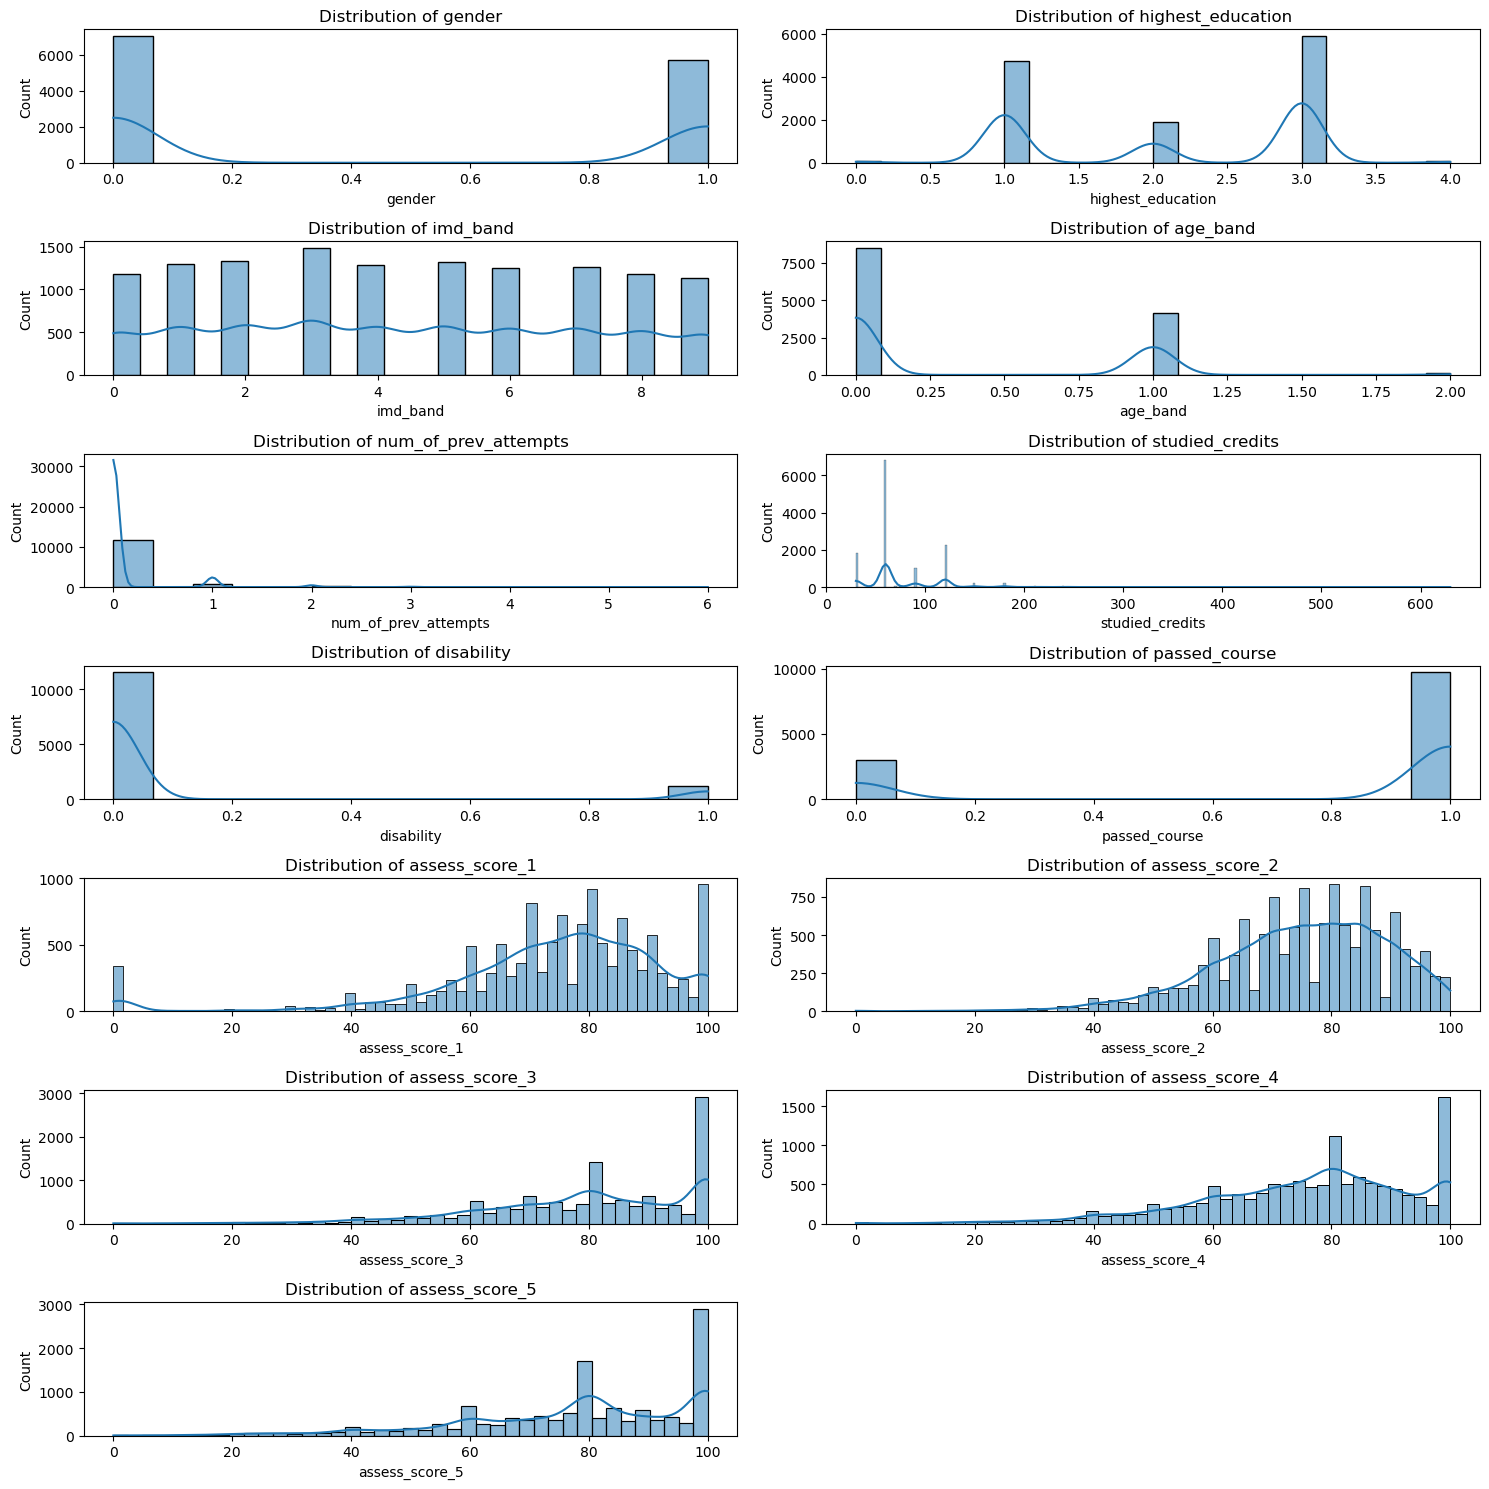

In [6]:
plot_distributions(df, n_cols=2, figsize=(15, 15)) 

In [7]:
columns_to_check = ['gender','disability','highest_education', 'imd_band', 'age_band','num_of_prev_attempts','studied_credits']
distinct_values = get_distinct_values(df, columns_to_check)
for col, values in distinct_values.items():
    print(f"{col}: {values}")

gender: [1 0]
disability: [0 1]
highest_education: [2 3 1 4 0]
imd_band: [9 2 5 3 7 6 0 8 1 4]
age_band: [2 1 0]
num_of_prev_attempts: [0 1 2 3 4 5 6]
studied_credits: [240  60 120 150 180 170  90  75 135  70 325 300 130 195 270 210 165 330
 250  40  30  80 235 160  45 105 630 100 110 220  95 145 280 155 190 200
 140  85 360 430]


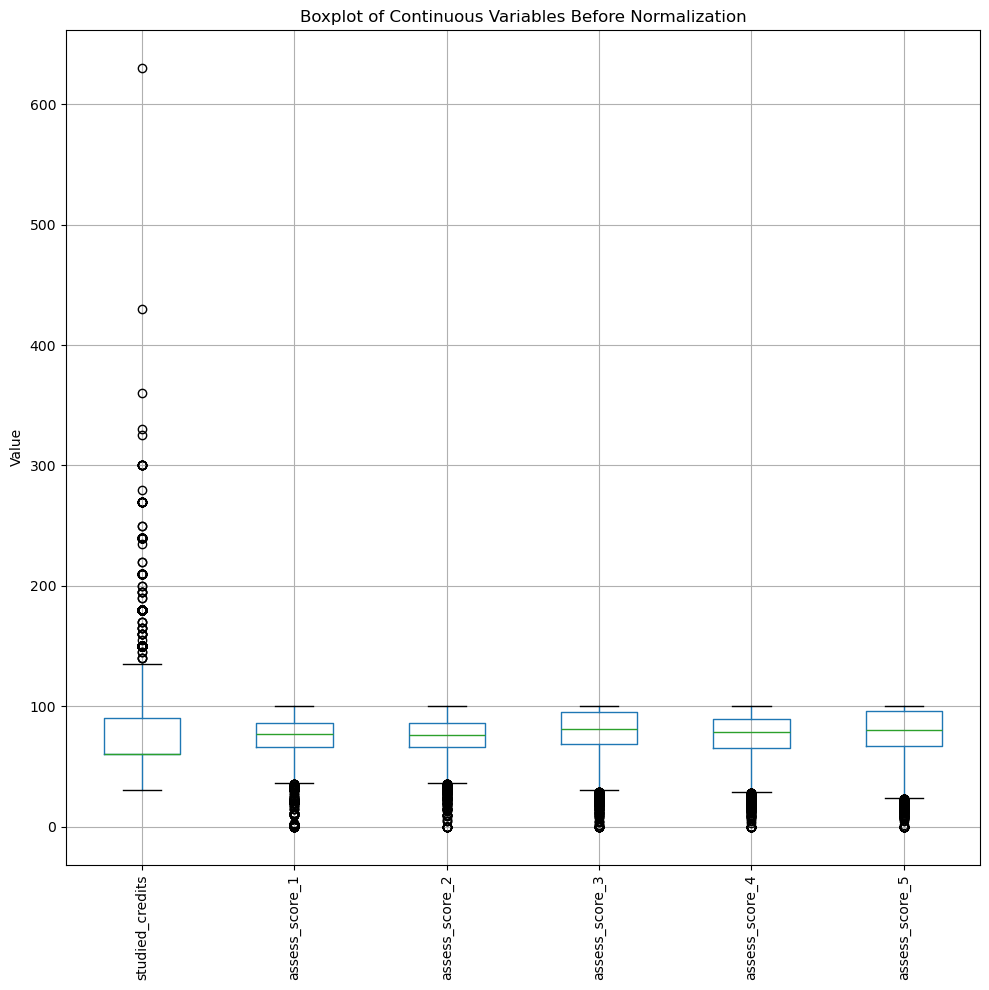

In [8]:
numerical_columns = ['studied_credits', 'assess_score_1', 'assess_score_2', 'assess_score_3','assess_score_4', 'assess_score_5']
plot_boxplot_before_normalization(df, numerical_columns,figsize=(10, 10))

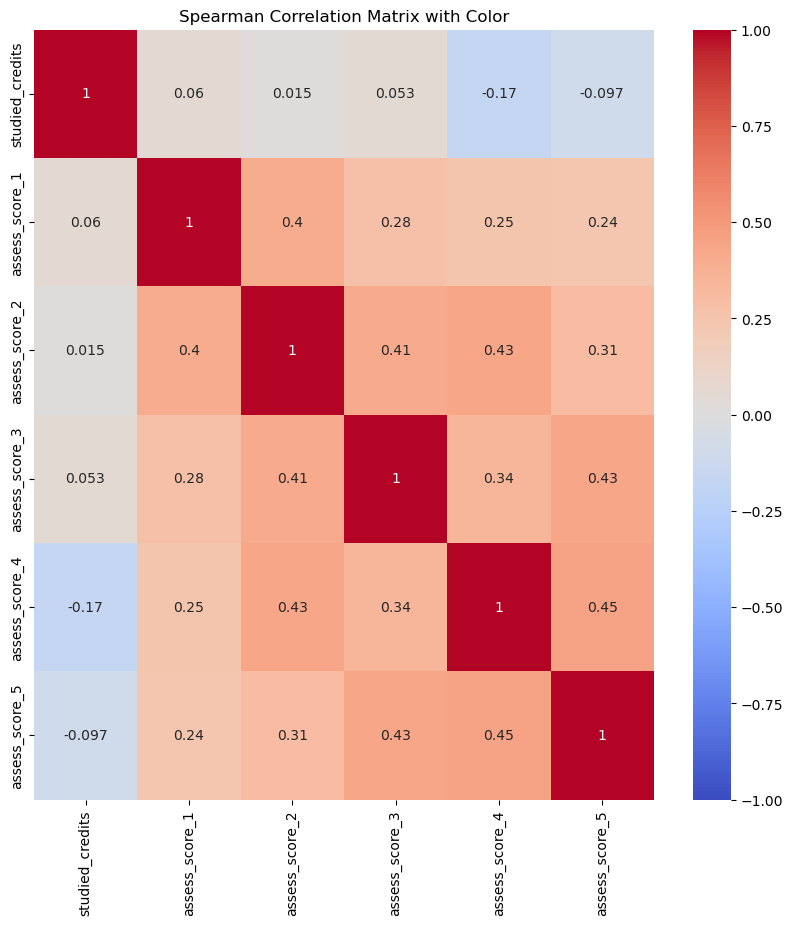

In [9]:
continues_columns = ['studied_credits', 'assess_score_1', 'assess_score_2', 'assess_score_3','assess_score_4', 'assess_score_5']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[continues_columns] = scaler.fit_transform(df[continues_columns])
pearson_corr_matrix = df_scaled[continues_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(pearson_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title('Spearman Correlation Matrix with Color')
plt.show()

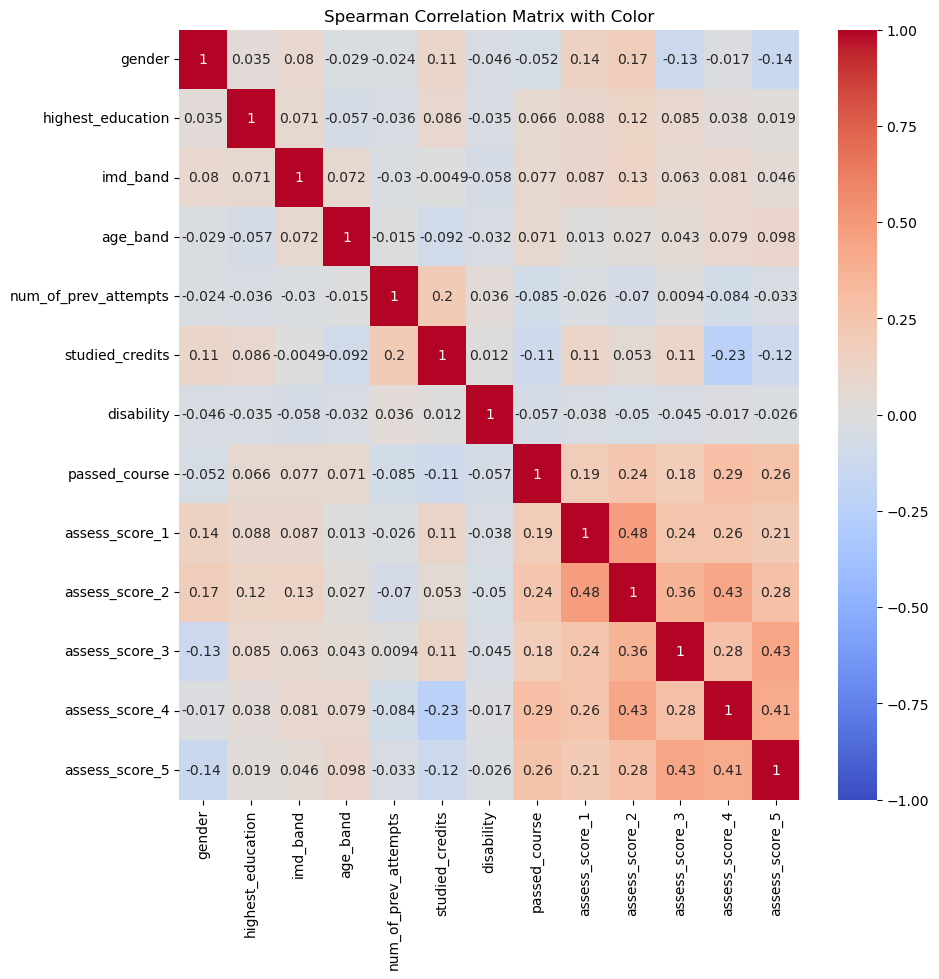

In [10]:
columns = df.columns
plot_spearman_correlation(df, columns,figsize=(10, 10))

### Prepare the data for modeling

In [11]:
continuous_columns = ['studied_credits', 'assess_score_1', 'assess_score_2', 'assess_score_3','assess_score_4', 'assess_score_5']
binary_columns = ['gender', 'disability','passed_course']
categorical_columns = ['highest_education', 'imd_band', 'age_band','num_of_prev_attempts']
df_preprocessed = df.copy()

In [12]:
scaler = StandardScaler()
df_preprocessed[continuous_columns] = scaler.fit_transform(df[continuous_columns])

### Use a KMeans model to cluster the students into an optimal number of clusters. 

We use k= 5 because the elbow method shows that the curve starts to flatten after k=5 and the silhouette scores does not change significantly after that. This is a good indication that the clusters are well separated and the number of clusters is a good choice.

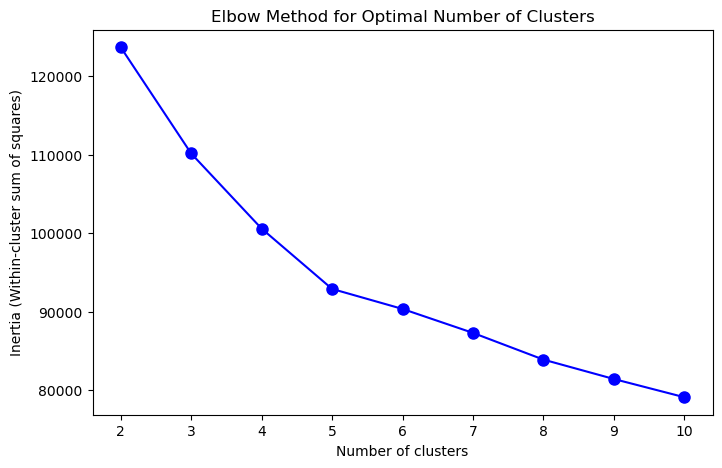

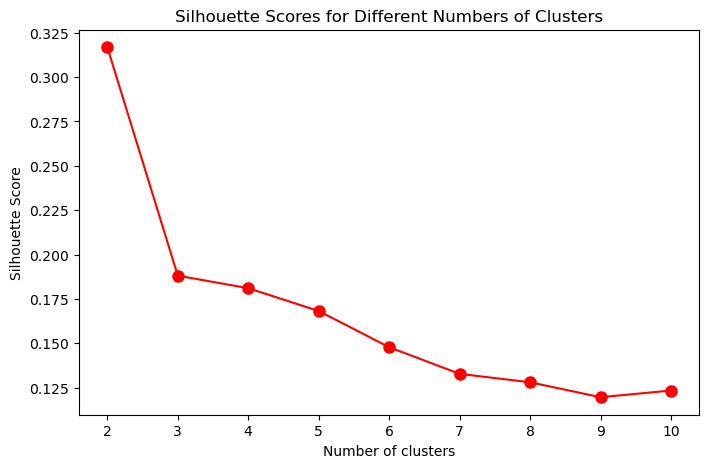

In [13]:
plot_elbow_method(df_preprocessed)
silhouette_scores = calculate_silhouette_scores(df_preprocessed)


In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(df_preprocessed)
df_preprocessed['cluster'] = cluster_labels

### Analyze and report on the clusters

**We can see that the clusters are well separated on:**

* assessment scores
* gender
* disability variables
* imd_band
* age_band
* highest_education

**More important, we can clearly relate some of this differences between each other:**

* Cluster 3 has the best perfomance in terms of passed course and assessment scores, but also has the best indicators for imb band, less proportion of disability, age band a litle older and a high proportion with highest education.
education.

* Cluster 4 is very special because it has the third best perfomance in terms of passed course and similar to cluster 0 in assessment scores but they have a higher numnber of students with high socioeconomic deprivation (imd band low), they are similar in age band and disability to cluster 1 and 2 (the lower performers) but they manage to get the more proportion of students to the higher education. They are significantly different in the gender distribution respect to the other clusters and the natural proportions.

* Cluster 1 it's also special case because it's the second worst performer but has a medium low socioeconomica deprivation,it has not a high disability so we wil except best results. Something important: it's the other extreme in gender respect to cluster 4 being also differente than the natural proportions

**In conclusion, we can say that the cluster all well separated and they are different in terms of the features variables and we can extract information from them. Evidence in the data to get deep dive is in the next section**


#### Cluster Centroids for Continuous Variables

i want to see the mean of the clusters for the continuous columns and understand how far are the values from the mean of the column for each cluster

Answer:

* since the variance between the columns of assessment scores is high and the means of the assessment scores are different between the clusters, we can say that this a first indication that the clusters are well separated on this variables

* the studied credits is not very different between the clusters

* The cluster 1 and 2 are the worst in terms of assessment scores, while the cluster 3 is the best. Cluster 0 and 4 are a litle behing 3 and similar between them.

Evidence in the data:

In [15]:
# Access the centroids of the clusters
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_preprocessed.columns[:-1])
centroids_df['cluster'] = range(5) 
centroids_df[continues_columns]

,studied_credits,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,-0.040267,0.224200,0.255347,0.297436,0.306331,0.294756
1,0.086731,-0.653238,-0.743385,-0.834539,-0.841158,-0.904533
2,0.126355,-0.792906,-1.003757,-1.078641,-1.112747,-1.035968
3,-0.055047,0.354302,0.476693,0.432358,0.445702,0.421684
4,-0.015484,0.187865,0.183630,0.292235,0.290072,0.326681


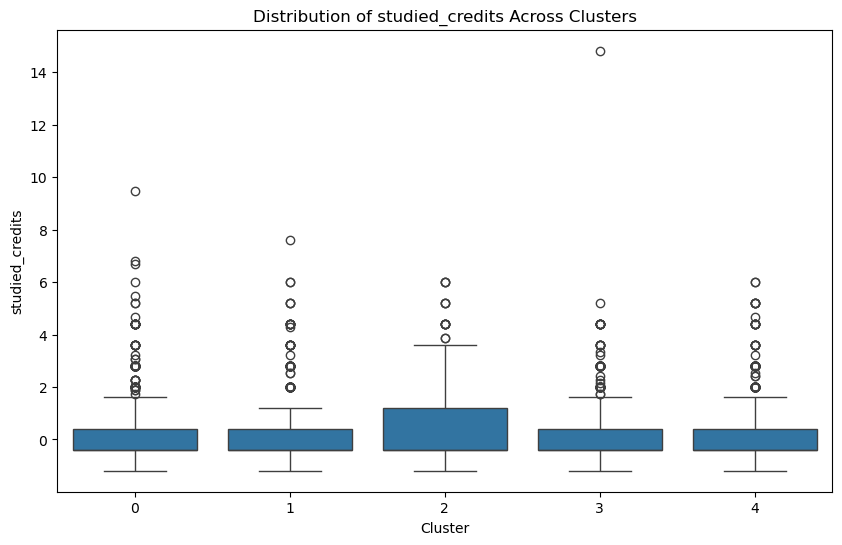

In [16]:
plot_cluster_boxplot(df_preprocessed, 'cluster', 'studied_credits')

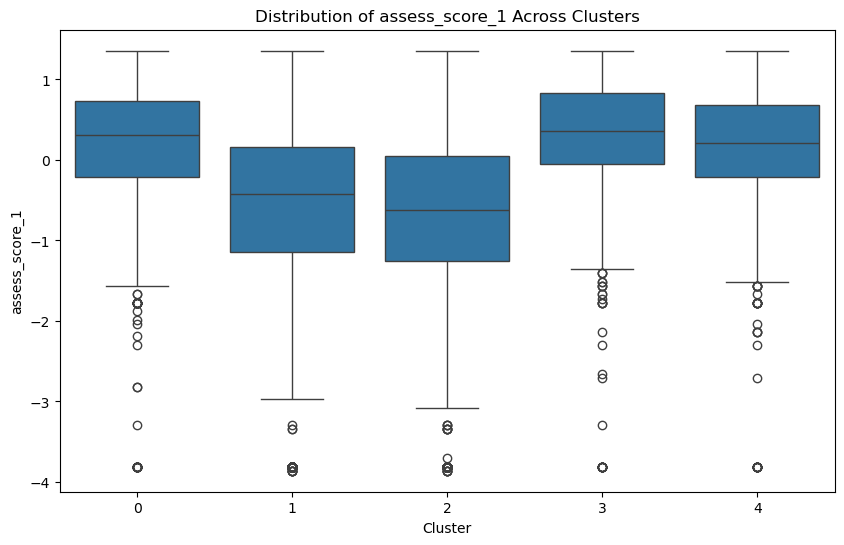

In [17]:
plot_cluster_boxplot(df_preprocessed, 'cluster', 'assess_score_1')

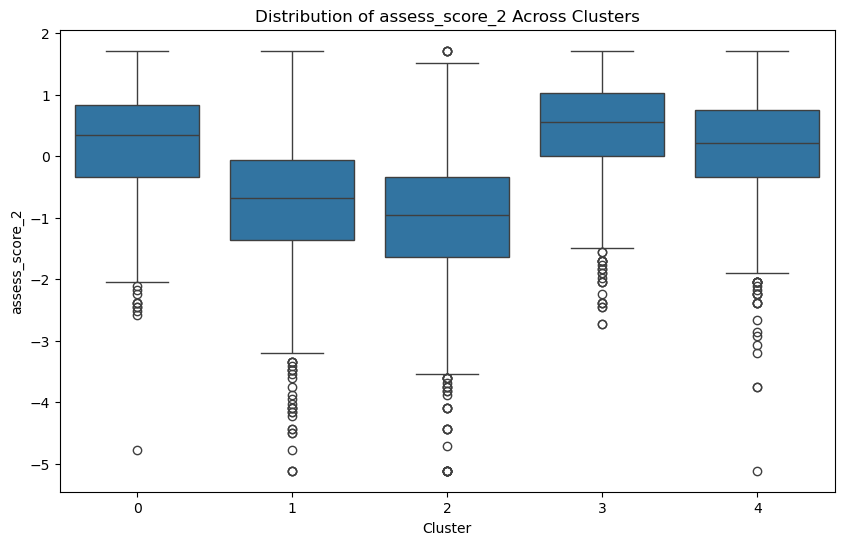

In [18]:
plot_cluster_boxplot(df_preprocessed, 'cluster', 'assess_score_2')

In [19]:
df_preprocessed.groupby('cluster')[continues_columns].describe().T

cluster                          0            1            2            3  \
studied_credits count  3205.000000  1720.000000  1661.000000  3410.000000   
                mean     -0.039907     0.085986     0.124088    -0.055047   
                std       0.991280     1.031859     1.072093     0.945594   
                min      -1.194821    -1.194821    -1.194821    -1.194821   
                25%      -0.393977    -0.393977    -0.393977    -0.393977   
                50%      -0.393977    -0.393977    -0.393977    -0.393977   
                75%       0.406867     0.406867     1.207710     0.406867   
                max       9.483096     7.614461     6.012773    14.822055   
assess_score_1  count  3205.000000  1720.000000  1661.000000  3410.000000   
                mean      0.224498    -0.653283    -0.794081     0.354302   
                std       0.747721     1.262330     1.295100     0.667878   
                min      -3.809147    -3.861335    -3.861335    -3.809147   
                25%      -0.208167    -1.147553    -1.251929    -0.051602   
                50%       0.313715    -0.416919    -0.625672     0.365903   
                75%       0.731220     0.157150     0.052774     0.835596   
                max       1.357477     1.357477     1.357477     1.357477   
assess_score_2  count  3205.000000  1720.000000  1661.000000  3410.000000   
                mean      0.255446    -0.742989    -1.003165     0.476693   
                std       0.792111     0.991953     1.009491     0.720299   
                min      -4.772414    -5.113706    -5.113706    -2.724664   
                25%      -0.335622    -1.359497    -1.632530     0.005670   
                50%       0.346962    -0.676914    -0.949947     0.551737   
                75%       0.824770    -0.062588    -0.335622     1.029545   
                max       1.712129     1.712129     1.712129     1.712129   
assess_score_3  count  3205.000000  1720.000000  1661.000000  3410.000000   
                mean      0.298037    -0.835000    -1.079754     0.432358   
                std       0.755931     0.978596     1.052045     0.651920   
                min      -4.517648    -4.517648    -4.517648    -2.647912   
                25%      -0.154932    -1.401422    -1.684715     0.015044   
                50%       0.298338    -0.834835    -1.118129     0.524972   
                75%       1.148217    -0.098273    -0.381566     1.148217   
                max       1.148217     1.148217     1.148217     1.148217   
assess_score_4  count  3205.000000  1720.000000  1661.000000  3410.000000   
                mean      0.306300    -0.840432    -1.113807     0.445702   
                std       0.771500     0.971597     1.011510     0.658454   
                min      -4.211281    -4.211281    -4.211281    -3.265210   
                25%      -0.204390    -1.428718    -1.762625     0.073867   
                50%       0.296472    -0.816554    -1.094810     0.463426   
                75%       0.908636    -0.204390    -0.482646     0.964287   
                max       1.353846     1.353846     1.353846     1.353846   
assess_score_5  count  3205.000000  1720.000000  1661.000000  3410.000000   
                mean      0.295025    -0.904338    -1.036253     0.421684   
                std       0.762173     1.018072     1.019038     0.663324   
                min      -3.999908    -3.999908    -3.999908    -3.641477   
                25%      -0.108379    -1.542100    -1.746917     0.096439   
                50%       0.301256    -0.876444    -0.927648     0.506073   
                75%       1.120525    -0.159583    -0.313196     1.120525   
                max       1.120525     1.120525     1.120525     1.120525   

cluster                          4  
studied_credits count  2741.000000  
                mean     -0.014007  
                std       1.001453  
                min      -1.194821  
                25%      -0.393977  
    

####  Feature Comparison for Categorical and Binary Variables

I analyze the binary variables and the categorical variables to see the differences between the clusters and the natural proportions. The results are the following:

* For passed course, cluster 3 has a higher proportion of students who passed the course, following near by 0 and 4. Then you have cluster 1 and 2 has a higher proportion of students who failed the course

* Assesment score follows the same pattern as passed course

* For gender, cluster 1 and 4 are the extremes, cluster 3 is a litle bit more different than natural proportions and 0 and 2 are similar to natural proportions.

* For disability, cluster 2 has a higher proportion of students with a disability, while cluster 3 has a higher proportion of students without a disability. The rest of clusters are similar to natural proportions.

* For socioeconomic deprivation, cluster 4 has a higher proportion of students with it (low imbd band), while cluster 3 has a higher proportion of students withouth it (higher imd band). The order from more socioeconomic deprivation to less is 4,2,0,1,3.

* for age band only 0 and 3 does not follow the natural proportions, being 3 a litle higher than 0 (then, older)

In [20]:
cluster_proportions_binary = calculate_cluster_proportions(df_preprocessed, binary_columns)
cluster_proportions_binary 

,gender_0,gender_1,disability_0,disability_1,passed_course_0,passed_course_1
cluster,,,,,,
0,0.569735,0.430265,0.915757,0.084243,0.158502,0.841498
1,0.475000,0.525000,0.904070,0.095930,0.431977,0.568023
2,0.564118,0.435882,0.868152,0.131848,0.498495,0.501505
3,0.524047,0.475953,0.934604,0.065396,0.121408,0.878592
4,0.613280,0.386720,0.893105,0.106895,0.191171,0.808829


In [21]:
natural_proportions_binary = calculate_natural_proportions(df, binary_columns)
natural_proportions_binary

,gender_0,gender_1,disability_0,disability_1,passed_course_1,passed_course_0
proportion,0.553349,0.446651,NaN,NaN,NaN,NaN
proportion,NaN,NaN,0.908142,0.091858,NaN,NaN
proportion,NaN,NaN,NaN,NaN,0.763131,0.236869


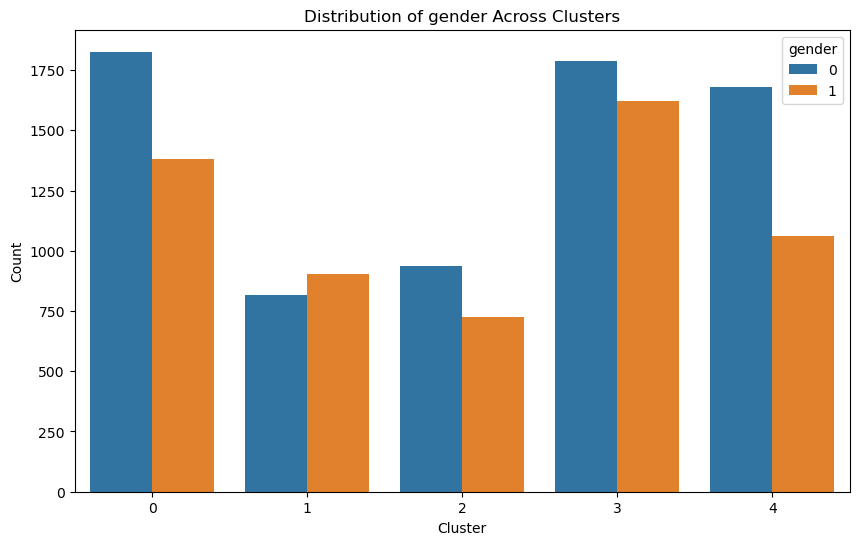

In [22]:
plot_cluster_barplot(df_preprocessed, 'cluster', 'gender')

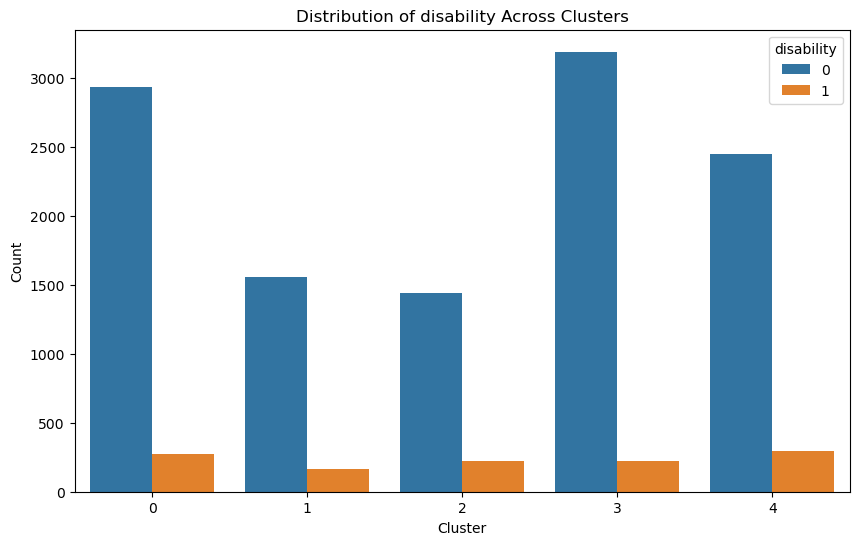

In [23]:
plot_cluster_barplot(df_preprocessed, 'cluster', 'disability' )

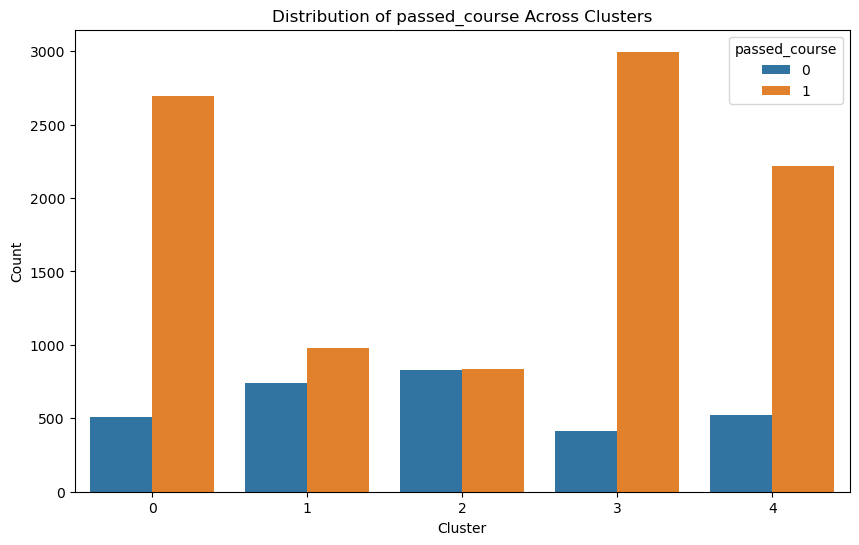

In [24]:
plot_cluster_barplot(df_preprocessed, 'cluster', 'passed_course' )

In [25]:
categorical_columns_1 = ['highest_education']
cluster_proportions_cc_1 = calculate_cluster_proportions(df_preprocessed, categorical_columns_1)
cluster_proportions_cc_1


,highest_education_0,highest_education_1,highest_education_2,highest_education_3,highest_education_4
cluster,,,,,
0,0.005616,0.344774,0.154758,0.492980,0.001872
1,0.002907,0.428488,0.137209,0.428488,0.002907
2,0.022276,0.448525,0.114991,0.412402,0.001806
3,0.002346,0.298827,0.192375,0.490029,0.016422
4,0.010945,0.414082,0.116381,0.454214,0.004378


In [26]:
natural_proportions_cc_1 = calculate_natural_proportions(df, categorical_columns_1)
natural_proportions_cc_1

highest_education,3,highest_education_1,2,highest_education_0,4
proportion,0.464631,0.372223,0.149015,0.007694,0.006438


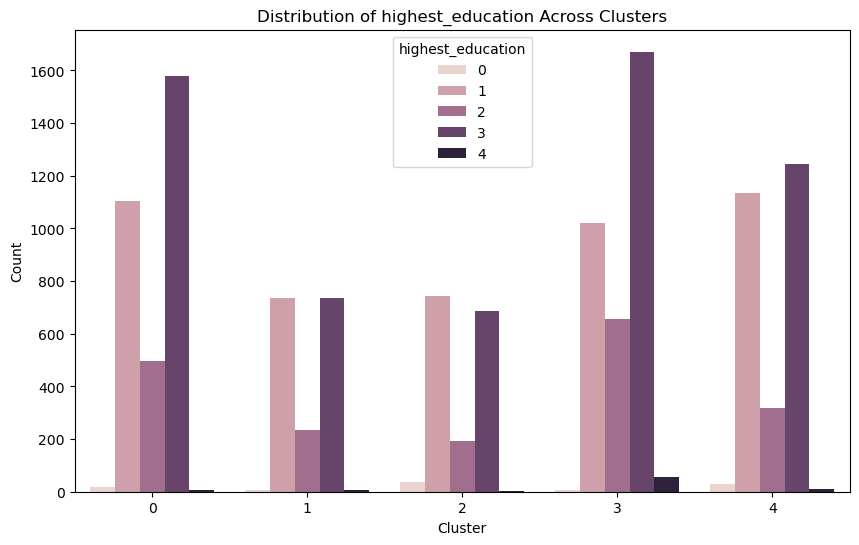

In [27]:
plot_cluster_barplot(df_preprocessed, 'cluster', categorical_columns_1[0])

In [28]:
categorical_columns_2 = ['num_of_prev_attempts']
cluster_proportions_cc_2 = calculate_cluster_proportions(df_preprocessed, categorical_columns_2)
cluster_proportions_cc_2

,num_of_prev_attempts_0,num_of_prev_attempts_1,num_of_prev_attempts_2,num_of_prev_attempts_3,num_of_prev_attempts_4,num_of_prev_attempts_5,num_of_prev_attempts_6
cluster,,,,,,,
0,0.929173,0.058970,0.009048,0.001560,0.000936,0.000312,NaN
1,0.899419,0.083721,0.014535,0.001163,0.001163,NaN,NaN
2,0.879591,0.094521,0.018663,0.006020,NaN,0.001204,NaN
3,0.926393,0.061290,0.009677,0.002053,0.000293,NaN,0.000293
4,0.910617,0.068223,0.017147,0.003283,0.000730,NaN,NaN


In [29]:
natural_proportions_cc_2 = calculate_natural_proportions(df, categorical_columns_2)
natural_proportions_cc_2

num_of_prev_attempts,num_of_prev_attempts_0,num_of_prev_attempts_1,2,3,4,5,6
proportion,0.913951,0.069561,0.012954,0.002591,0.000628,0.000236,0.000079


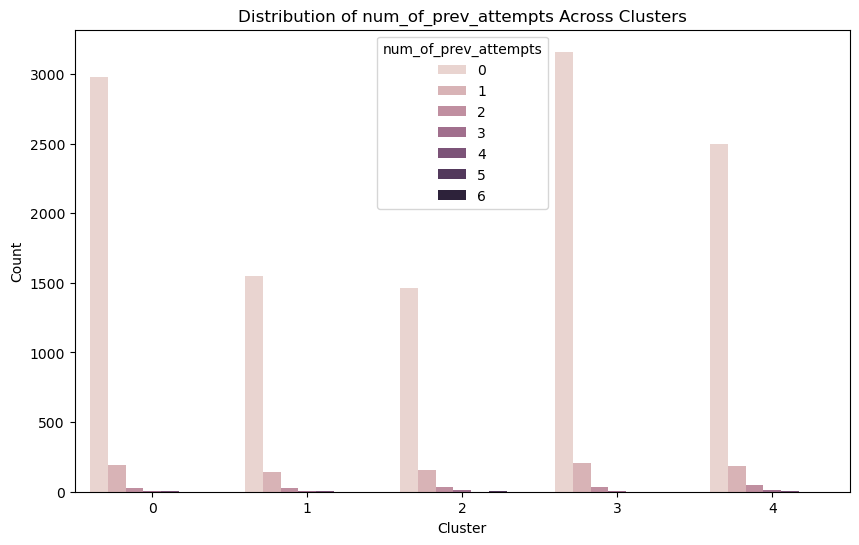

In [30]:
plot_cluster_barplot(df_preprocessed, 'cluster', categorical_columns_2[0])

In [31]:
categorical_columns_3 = ['imd_band']
cluster_proportions_cc_3 = calculate_cluster_proportions(df_preprocessed, categorical_columns_3)
cluster_proportions_cc_3

,imd_band_0,imd_band_1,imd_band_2,imd_band_3,imd_band_4,imd_band_5,imd_band_6,imd_band_7,imd_band_8,imd_band_9
cluster,,,,,,,,,,
0,NaN,NaN,NaN,0.337285,0.346958,0.315757,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.177326,0.288372,0.248837,0.159302,0.126163
2,0.185430,0.229982,0.236002,0.243829,0.104756,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.220235,0.244282,0.266569,0.268915
4,0.319956,0.334914,0.345130,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
natural_proportions_cc_3 = calculate_natural_proportions(df, categorical_columns_3)
natural_proportions_cc_3

imd_band,3,2,5,imd_band_1,4,7,6,imd_band_0,8,9
proportion,0.116668,0.105048,0.1034,0.102065,0.100966,0.099003,0.097904,0.093036,0.092879,0.089032


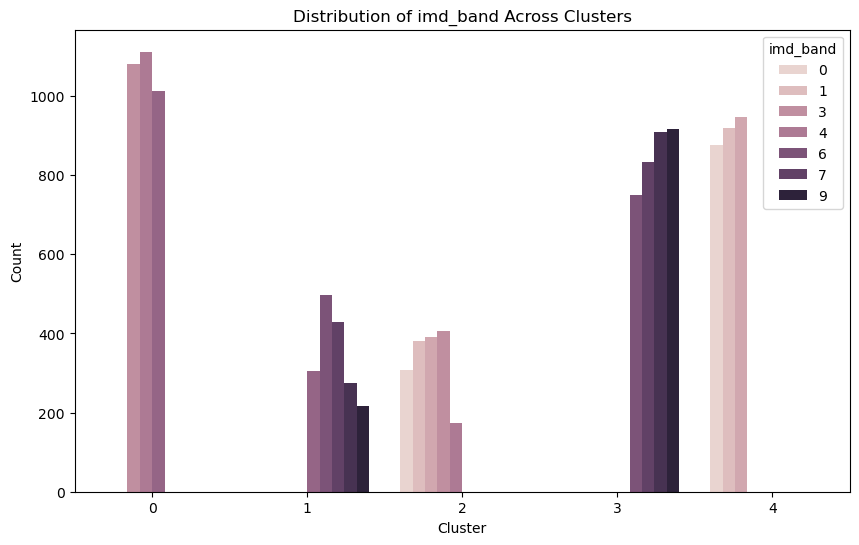

In [33]:
plot_cluster_barplot(df_preprocessed, 'cluster', categorical_columns_3[0])

In [34]:
categorical_columns_4 = ['age_band']
cluster_proportions_cc_4 = calculate_cluster_proportions(df_preprocessed, categorical_columns_4)
cluster_proportions_cc_4

,age_band_0,age_band_1,age_band_2
cluster,,,
0,0.652730,0.341966,0.005304
1,0.711047,0.280233,0.008721
2,0.717038,0.282360,0.000602
3,0.605865,0.377126,0.017009
4,0.707771,0.290770,0.001459


In [35]:
natural_proportions_cc_4 = calculate_natural_proportions(df, categorical_columns_4)
natural_proportions_cc_4

age_band,age_band_0,age_band_1,2
proportion,0.668289,0.324252,0.007459


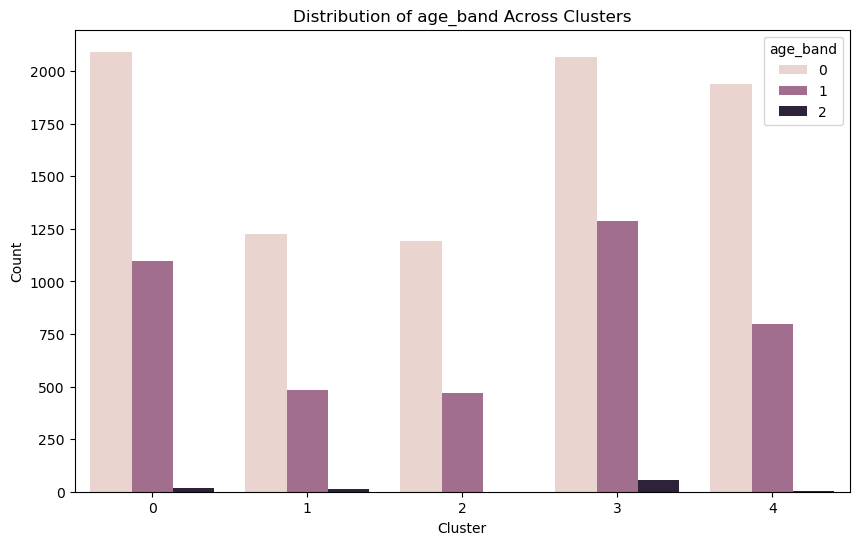

In [36]:
plot_cluster_barplot(df_preprocessed, 'cluster', categorical_columns_4[0])